In [521]:
import pandas as pd
import glob
import plotly.express as px

In [522]:
# from the ../ids/ folder import the tool_ids.csv
tool_df = pd.read_csv( '../ids/tool_ids.csv', usecols=['fetch_tool', 'fetch_tool_id'])
# rename the fetch_tool_id column to type_tool
tool_df = tool_df.rename(columns={'fetch_tool_id': 'type_tool'})
tool_df

,fetch_tool,type_tool
0,REACH_FORK,0
1,PALLET_JACK,1
2,ORDER_PICKER,2
3,CROSS_DOCK,3


In [523]:
Current_positions_results_df = pd.read_csv('../original/results/fetch_tasks_results.csv')
Current_positions_results_df['positions'] = 'Current'
Current_positions_results_df['placement'] = 'Current'
Current_positions_results_df

,t_now,employee,tool,type_tool,task_time,num_of_items,num_of_aisles,positions,placement
0,2021-01-01 08:00:00,1,3,1,46.0,1,1,Current,Current
1,2021-01-01 08:03:15,4,7,2,175.0,1,1,Current,Current
2,2021-01-01 08:04:04,1,3,1,95.0,1,1,Current,Current
3,2021-01-01 08:05:17,2,2,1,70.0,1,1,Current,Current
4,2021-01-01 08:07:30,1,3,1,62.0,1,1,Current,Current
...,...,...,...,...,...,...,...,...,...
21050,2021-02-25 08:09:12,0,0,3,0.0,9819,1,Current,Current
21051,2021-02-25 08:09:27,0,0,3,0.0,9820,1,Current,Current
21052,2021-02-25 08:10:10,1,3,1,96.0,1,1,Current,Current
21053,2021-02-25 08:11:14,2,2,1,67.0,1,1,Current,Current


In [524]:
fetch_task_results_paths_list = glob.glob(r'../placement*/results/fetch_tasks_results.csv', recursive=True)
fetch_task_results_paths_list

['..\\placement1\\results\\fetch_tasks_results.csv',
 '..\\placement2\\results\\fetch_tasks_results.csv',
 '..\\placement3\\results\\fetch_tasks_results.csv',
 '..\\placement4\\results\\fetch_tasks_results.csv',
 '..\\placement5\\results\\fetch_tasks_results.csv',
 '..\\placement6\\results\\fetch_tasks_results.csv',
 '..\\placement7\\results\\fetch_tasks_results.csv']

In [525]:
# from the first item in fetch_task_results_paths_list, fetch the digit after 'placement' and before '/'
placement_number = fetch_task_results_paths_list[0].split('placement')[1].split('\\')[0]
placement_number

'1'

In [526]:
df_list = []
for path in fetch_task_results_paths_list:
    df = pd.read_csv(path)
    df['placement'] = path.split('placement')[1].split('\\')[0]
    df['positions'] = 'Improved'
    df_list.append(df)
# concatenate the list of dataframes into one dataframe
improved_positions_results_df = pd.concat(df_list)
improved_positions_results_df

,t_now,employee,tool,type_tool,task_time,num_of_items,num_of_aisles,placement,positions
0,2021-01-01 08:00:00,1,3,1,55.0,1,1,1,Improved
1,2021-01-01 08:03:15,4,7,2,167.0,1,1,1,Improved
2,2021-01-01 08:04:04,1,3,1,79.0,1,1,1,Improved
3,2021-01-01 08:05:17,2,2,1,65.0,1,1,1,Improved
4,2021-01-01 08:07:30,1,3,1,58.0,1,1,1,Improved
...,...,...,...,...,...,...,...,...,...
10242,2021-01-31 14:22:16,0,0,3,0.0,661,1,7,Improved
10243,2021-01-31 14:23:05,1,3,1,54.0,1,1,7,Improved
10244,2021-01-31 14:23:35,2,2,1,98.0,1,1,7,Improved
10245,2021-01-31 14:23:53,0,0,3,0.0,662,1,7,Improved


In [527]:
# concat the Current_positions_results_dfand  improved_positions_results_df:
fetch_task_results_df = pd.concat([Current_positions_results_df, improved_positions_results_df])
MAX_DATETIME = pd.to_datetime('2021-02-22')
# change t_now to datetime
fetch_task_results_df['t_now'] = pd.to_datetime(fetch_task_results_df['t_now'])
fetch_task_results_df = fetch_task_results_df[fetch_task_results_df['t_now'] < MAX_DATETIME]
fetch_task_results_df

,t_now,employee,tool,type_tool,task_time,num_of_items,num_of_aisles,positions,placement
0,2021-01-01 08:00:00,1,3,1,46.0,1,1,Current,Current
1,2021-01-01 08:03:15,4,7,2,175.0,1,1,Current,Current
2,2021-01-01 08:04:04,1,3,1,95.0,1,1,Current,Current
3,2021-01-01 08:05:17,2,2,1,70.0,1,1,Current,Current
4,2021-01-01 08:07:30,1,3,1,62.0,1,1,Current,Current
...,...,...,...,...,...,...,...,...,...
10242,2021-01-31 14:22:16,0,0,3,0.0,661,1,Improved,7
10243,2021-01-31 14:23:05,1,3,1,54.0,1,1,Improved,7
10244,2021-01-31 14:23:35,2,2,1,98.0,1,1,Improved,7
10245,2021-01-31 14:23:53,0,0,3,0.0,662,1,Improved,7


In [528]:
# merge with the tool_df dataframe on the type_tool column
fetch_task_results_df = fetch_task_results_df.merge(tool_df, on='type_tool')
fetch_task_results_df

,t_now,employee,tool,type_tool,task_time,num_of_items,num_of_aisles,positions,placement,fetch_tool
0,2021-01-01 08:00:00,1,3,1,46.0,1,1,Current,Current,PALLET_JACK
1,2021-01-01 08:04:04,1,3,1,95.0,1,1,Current,Current,PALLET_JACK
2,2021-01-01 08:05:17,2,2,1,70.0,1,1,Current,Current,PALLET_JACK
3,2021-01-01 08:07:30,1,3,1,62.0,1,1,Current,Current,PALLET_JACK
4,2021-01-01 08:08:01,2,2,1,79.0,1,1,Current,Current,PALLET_JACK
...,...,...,...,...,...,...,...,...,...,...
123897,2021-01-31 14:21:54,0,0,3,0.0,658,1,Improved,7,CROSS_DOCK
123898,2021-01-31 14:22:07,0,0,3,0.0,659,1,Improved,7,CROSS_DOCK
123899,2021-01-31 14:22:13,0,0,3,0.0,660,1,Improved,7,CROSS_DOCK
123900,2021-01-31 14:22:16,0,0,3,0.0,661,1,Improved,7,CROSS_DOCK


In [529]:
# export the t_now, employee, tool, tool_id, task_time, positions, placement columns to a csv file
fetch_task_results_df[['t_now', 'employee', 'tool', 'type_tool', 'task_time', 'positions', 'placement']].to_csv('fetch_task_durations.csv', index=False)

<Axes: xlabel='fetch_tool'>

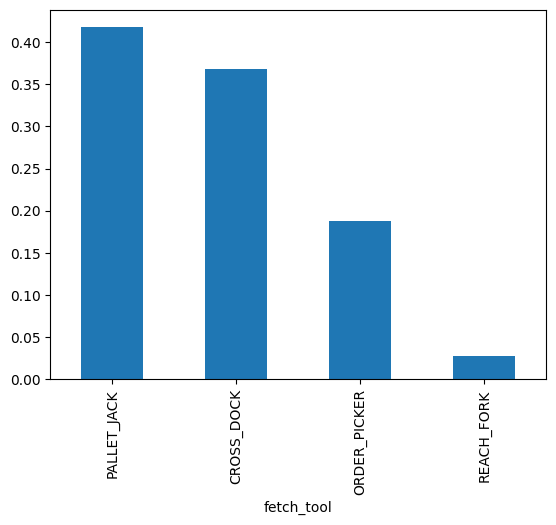

In [530]:
# show the percentage of fetch tasks for each fetch_tool using a plot
fetch_task_results_df['fetch_tool'].value_counts(normalize=True).plot(kind='bar')

In [531]:
# add a new column to the dataframe called 'fetch_type' which will be 'floor' if the fetch_tool is 'PALLET_JACK' or 'CROSS_DOCK' and 'high' otherwise
fetch_task_results_df['fetch_type'] = fetch_task_results_df['fetch_tool'].apply(lambda x: 'floor' if x in ['PALLET_JACK', 'CROSS_DOCK'] else 'high')
# add a date column to the dataframe
fetch_task_results_df['date'] = pd.to_datetime(fetch_task_results_df['t_now']).dt.date
fetch_task_results_df

,t_now,employee,tool,type_tool,task_time,num_of_items,num_of_aisles,positions,placement,fetch_tool,fetch_type,date
0,2021-01-01 08:00:00,1,3,1,46.0,1,1,Current,Current,PALLET_JACK,floor,2021-01-01
1,2021-01-01 08:04:04,1,3,1,95.0,1,1,Current,Current,PALLET_JACK,floor,2021-01-01
2,2021-01-01 08:05:17,2,2,1,70.0,1,1,Current,Current,PALLET_JACK,floor,2021-01-01
3,2021-01-01 08:07:30,1,3,1,62.0,1,1,Current,Current,PALLET_JACK,floor,2021-01-01
4,2021-01-01 08:08:01,2,2,1,79.0,1,1,Current,Current,PALLET_JACK,floor,2021-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...
123897,2021-01-31 14:21:54,0,0,3,0.0,658,1,Improved,7,CROSS_DOCK,floor,2021-01-31
123898,2021-01-31 14:22:07,0,0,3,0.0,659,1,Improved,7,CROSS_DOCK,floor,2021-01-31
123899,2021-01-31 14:22:13,0,0,3,0.0,660,1,Improved,7,CROSS_DOCK,floor,2021-01-31
123900,2021-01-31 14:22:16,0,0,3,0.0,661,1,Improved,7,CROSS_DOCK,floor,2021-01-31


In [580]:
# create the same plot as above, only now group by the positions column
fetch_rates_df = fetch_task_results_df.groupby(['date', 'positions'])[
    'fetch_type'].value_counts(normalize=True).unstack()

fetch_rates_flat_df = fetch_rates_df.reset_index().drop('high', axis=1)
# if 'positions' == 'Current', make the 'floor' column negative
fetch_rates_flat_df.loc[fetch_rates_flat_df['positions'] == 'Current', 'floor'] = - \
    fetch_rates_flat_df.loc[fetch_rates_flat_df['positions']
                            == 'Current', 'floor']
# group by date and sum the floor column
fetch_rates_flat_df = fetch_rates_flat_df.groupby(
    'date')['floor'].sum().reset_index()
# add a new column called 'improved_better' which will be True if the floor column is positive and False otherwise
fetch_rates_flat_df['improved_better'] = fetch_rates_flat_df['floor'] > 0
# save the percentage of True values in improved_better to a variable called 'improved_better_percentage'
improvement_delta = fetch_rates_flat_df['floor'].mean()
improved_better_percentage = fetch_rates_flat_df['improved_better'].mean()
improved_better_percentage

fig = px.line(fetch_rates_df, x=fetch_rates_df.index.get_level_values(0), y='floor', color=fetch_rates_df.index.get_level_values(
    1), title='Fetch Rates by Date and Positions', labels={'floor': 'Fetch Rate', 'index': 'Date'})
# capitalize the legend items
fig.for_each_trace(lambda t: t.update(name=t.name.capitalize()))
fig.update_layout(title='Floor Fetch Rates by Date and Positions', xaxis_title='Date', yaxis_title='Floor Fetch Rate',
                  legend_title='Placement', legend=dict(orientation='h', yanchor='top', y=-0.2, xanchor='right', x=1), font=dict(size=14))
# add a subtitle with the improved_better_percentage, round to 2 decimal places
fig.add_annotation(x=0, y=1.1, xref='paper', yref='paper',
                   text=f'Improved above Current at: {improved_better_percentage:.2%} of dates, mean improvement of {improvement_delta:.2%}', showarrow=False, font=dict(size=14))

# change the y axis to percents
fig.update_yaxes(tickformat='.0%')


# hide the xaxis labels
fig.update_xaxes(showticklabels=False, showgrid=False)

fig.show()

# export the fig to a png file under the ./graphs/ folder
fig.write_image('./graphs/fetch_rates_by_date_and_positions.png',
                width=800, height=400)

In [ ]:
# create the same graph as above, only now group by the positions column
mean_tool_fetch_time_by_dates_df = fetch_task_results_df.groupby(['date', 'positions', 'fetch_tool'])['task_time'].mean().unstack()
# drop the 'CROSS_DOCK' column
mean_tool_fetch_time_by_dates_df = mean_tool_fetch_time_by_dates_df.drop(columns=['CROSS_DOCK'])
mean_tool_fetch_time_by_dates_df

In [541]:
# mean_tool_fetch_time_by_dates_only_df should be like mean_tool_fetch_time_by_dates_df but only with 'date' as index
mean_tool_fetch_time_by_dates_only_df = mean_tool_fetch_time_by_dates_df.reset_index(level=1)
# convert every float from seconds to minutes
mean_tool_fetch_time_by_dates_only_df[['ORDER_PICKER', 'PALLET_JACK', 'REACH_FORK']] = mean_tool_fetch_time_by_dates_only_df[['ORDER_PICKER', 'PALLET_JACK', 'REACH_FORK']].apply(lambda x: x / 60)
mean_tool_fetch_time_by_dates_only_df

fetch_tool,positions,ORDER_PICKER,PALLET_JACK,REACH_FORK
date,,,,
2021-01-01,Current,1.961261,1.186022,1.650000
2021-01-01,Improved,2.056602,1.185468,1.667460
2021-01-03,Current,2.321901,1.310119,1.704861
2021-01-03,Improved,2.330464,1.265510,1.742012
2021-01-04,Current,2.663937,1.350402,1.893137
...,...,...,...,...
2021-02-18,Improved,2.204228,1.327655,3.097917
2021-02-19,Current,1.928704,1.289368,4.458333
2021-02-19,Improved,1.953333,1.273512,4.533333


In [542]:
# from the mean_tool_fetch_time_by_dates_only_df, remove each row that has an index which represents a Friday or Saturday
mean_tool_fetch_time_by_dates_only_df = mean_tool_fetch_time_by_dates_only_df[~pd.to_datetime(mean_tool_fetch_time_by_dates_only_df.index).dayofweek.isin([4,5])]
mean_tool_fetch_time_by_dates_only_df

fetch_tool,positions,ORDER_PICKER,PALLET_JACK,REACH_FORK
date,,,,
2021-01-03,Current,2.321901,1.310119,1.704861
2021-01-03,Improved,2.330464,1.265510,1.742012
2021-01-04,Current,2.663937,1.350402,1.893137
2021-01-04,Improved,2.763948,1.323006,1.888362
2021-01-05,Current,2.395370,1.334940,1.910417
...,...,...,...,...
2021-02-17,Improved,2.442633,1.338990,4.431548
2021-02-18,Current,2.153653,1.311806,2.991667
2021-02-18,Improved,2.204228,1.327655,3.097917


In [543]:
# import the make_subplots function from plotly
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# use plotly to create a plot with three subplots from the data of mean_tool_fetch_time_by_dates_only_df, each subplot should show one of the ORDER_PICKER, PALLET_JACK, and REACH_FORK columns, with the date index as the x axis, and the 'positions' column as the color
#  add a title and legend
improved_subplot_df = mean_tool_fetch_time_by_dates_only_df[mean_tool_fetch_time_by_dates_only_df['positions'] == 'Improved']
current_subplot_df = mean_tool_fetch_time_by_dates_only_df[mean_tool_fetch_time_by_dates_only_df['positions'] == 'Current']


In [581]:
fig = make_subplots(rows=1, cols=3, subplot_titles=['Order Picker', 'Pallet Jack', 'Reach Fork'], shared_yaxes=False)
fig.add_trace(go.Scatter(x=mean_tool_fetch_time_by_dates_only_df.index, y=improved_subplot_df['PALLET_JACK'], mode='lines', name='Improved', line=dict(color='red')), row=1, col=1)
fig.add_trace(go.Scatter(x=mean_tool_fetch_time_by_dates_only_df.index, y=current_subplot_df['PALLET_JACK'], mode='lines', name='Current', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=mean_tool_fetch_time_by_dates_only_df.index, y=improved_subplot_df['ORDER_PICKER'], mode='lines', name='Improved', line=dict(color='red')), row=1, col=2)
fig.add_trace(go.Scatter(x=mean_tool_fetch_time_by_dates_only_df.index, y=current_subplot_df['ORDER_PICKER'], mode='lines', name='Current', line=dict(color='blue')), row=1, col=2)
fig.add_trace(go.Scatter(x=mean_tool_fetch_time_by_dates_only_df.index, y=improved_subplot_df['REACH_FORK'], mode='lines', name='Improved', line=dict(color='red')), row=1, col=3)
fig.add_trace(go.Scatter(x=mean_tool_fetch_time_by_dates_only_df.index, y=current_subplot_df['REACH_FORK'], mode='lines', name='Current', line=dict(color='blue')), row=1, col=3)
fig.update_layout(title='Mean Fetch Time by Date and Fetch Tool (Long Day)', xaxis_title='Date', yaxis_title='Mean Fetch Time (m)', legend_title='Placement', legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='right', x=1), font=dict(size=14))

# change legend to include only one value of 'Improved' in blue and 'Current' in red
for i in range(2, 6):
    fig['data'][i]['showlegend'] = False

# hide the xaxis labels
fig.update_xaxes(showticklabels=False, showgrid=False)

fig.show()
# export the fig to a png file under the ./graphs/ folder
fig.write_image('./graphs/mean_fetch_time_by_date_and_fetch_tool.png', width=800, height=400)

In [546]:
floor_workers_list = [1,2,3]
height_workers_list = [4,5]
worker_type_df = fetch_task_results_df[['date', 'employee', 'task_time', 'positions', 'placement']][fetch_task_results_df['employee'] != 0].copy()
# if employee in floor_workers_list, set worker_type to 'floor', else set to 'height'
worker_type_df['worker_type'] = worker_type_df['employee'].apply(lambda x: 'floor' if x in floor_workers_list else 'height')
# from the worker_type_df, remove each row that has a 'date' value which represents a Friday
worker_type_df = worker_type_df[~pd.to_datetime(worker_type_df['date']).dt.dayofweek.isin([4,5])]
worker_type_df

,date,employee,task_time,positions,placement,worker_type
62,2021-01-03,1,65.0,Current,Current,floor
63,2021-01-03,2,63.0,Current,Current,floor
64,2021-01-03,3,90.0,Current,Current,floor
65,2021-01-03,1,52.0,Current,Current,floor
66,2021-01-03,1,66.0,Current,Current,floor
...,...,...,...,...,...,...
78286,2021-01-31,5,143.0,Improved,7,height
78287,2021-01-31,5,70.0,Improved,7,height
78288,2021-01-31,5,94.0,Improved,7,height
78289,2021-01-31,4,176.0,Improved,7,height


In [547]:
# group by positions, worker_type, date and employee, and calculate the sum of task_time
worker_type_df = worker_type_df.groupby(['positions', 'worker_type', 'date', 'placement']).sum()
# reset the index
worker_type_df = worker_type_df.reset_index()
worker_type_df

,positions,worker_type,date,placement,employee,task_time
0,Current,floor,2021-01-03,Current,461,22010.0
1,Current,floor,2021-01-04,Current,563,25579.0
2,Current,floor,2021-01-05,Current,522,22361.0
3,Current,floor,2021-01-06,Current,281,13826.0
4,Current,floor,2021-01-07,Current,318,15018.0
...,...,...,...,...,...,...
475,Improved,height,2021-02-18,1,301,9250.0
476,Improved,height,2021-02-18,2,310,9293.0
477,Improved,height,2021-02-18,3,313,9497.0
478,Improved,height,2021-02-18,4,312,9420.0


In [548]:
# drop the employee column
worker_type_df = worker_type_df.drop(columns=['placement', 'employee'])
# group by positions, date and worker_type, and calculate the mean of task_time, change the name of the column to 'mean_task_time'
worker_type_df = worker_type_df.groupby(['positions', 'date', 'worker_type']).mean().rename(columns={'task_time': 'mean_task_time'})
# reset the index
worker_type_df = worker_type_df.reset_index()
# convert the task_time from seconds to minutes
worker_type_df['mean_task_time'] = worker_type_df['mean_task_time'] / 60
worker_type_df


,positions,date,worker_type,mean_task_time
0,Current,2021-01-03,floor,366.833333
1,Current,2021-01-03,height,321.866667
2,Current,2021-01-04,floor,426.316667
3,Current,2021-01-04,height,363.216667
4,Current,2021-01-05,floor,372.683333
...,...,...,...,...
139,Improved,2021-02-17,height,257.575000
140,Improved,2021-02-18,floor,165.625000
141,Improved,2021-02-18,height,156.083333
142,Improved,2021-02-21,floor,244.416667


In [549]:
floor_workers_subplot_df

,positions,date,worker_type,mean_task_time
0,Current,2021-01-03,floor,366.833333
2,Current,2021-01-04,floor,426.316667
4,Current,2021-01-05,floor,372.683333
6,Current,2021-01-06,floor,230.433333
8,Current,2021-01-07,floor,250.300000
...,...,...,...,...
134,Improved,2021-02-15,floor,156.279167
136,Improved,2021-02-16,floor,236.245833
138,Improved,2021-02-17,floor,183.441667
140,Improved,2021-02-18,floor,165.625000


In [598]:
# create a plot with two subplots, one for each worker_type, showing the mean_task_time for each date, with the positions as the color
# add a title and legend
fig = make_subplots(rows=1, cols=2, subplot_titles=['Floor Workers', 'Height Workers'], shared_yaxes=False)

floor_workers_subplot_df = worker_type_df[worker_type_df['worker_type'] == 'floor']
height_workers_subplot_df = worker_type_df[worker_type_df['worker_type'] == 'height']

x = 0
for df in [floor_workers_subplot_df, height_workers_subplot_df]:
    df = df.reset_index().drop('worker_type', axis=1)
    # if 'positions' == 'Current', make the 'mean_task_time' column negative
    df.loc[df['positions'] == 'Current', 'mean_task_time'] = -df.loc[df['positions'] == 'Current', 'mean_task_time']
    # group by date and sum the mean_task_time column
    df = df.groupby('date')['mean_task_time'].sum().reset_index()
    # add a new column called 'improved_better' which will be True if the mean_task_time column is positive and False otherwise
    df['improved_better'] = df['mean_task_time'] > 0
    # save the percentage of True values in improved_better to a variable called 'improved_better_percentage'
    improvement_delta = df['mean_task_time'].mean()
    improved_better_percentage = df['improved_better'].mean()
    
    fig.add_annotation(x=x, y=-0.2, xref='paper', yref='paper', text=f'Improved above Current: {improved_better_percentage:.2%}', showarrow=False, font=dict(size=14))
    fig.add_annotation(x=x, y=-0.3, xref='paper', yref='paper', text=f'Mean delta: {round(improvement_delta,2)}', showarrow=False, font=dict(size=14))
    x += 1


fig.add_trace(go.Scatter(x=floor_workers_subplot_df[floor_workers_subplot_df['positions'] == 'Improved']['date'], y=floor_workers_subplot_df[floor_workers_subplot_df['positions'] == 'Improved']['mean_task_time'], mode='lines', name='Improved', line=dict(color='red')), row=1, col=1)
fig.add_trace(go.Scatter(x=floor_workers_subplot_df[floor_workers_subplot_df['positions'] == 'Current']['date'], y=floor_workers_subplot_df[floor_workers_subplot_df['positions'] == 'Current']['mean_task_time'], mode='lines', name='Current', line=dict(color='blue')), row=1, col=1)
fig.add_trace(go.Scatter(x=height_workers_subplot_df[height_workers_subplot_df['positions'] == 'Improved']['date'], y=height_workers_subplot_df[height_workers_subplot_df['positions'] == 'Improved']['mean_task_time'], mode='lines', name='Improved', line=dict(color='red')), row=1, col=2)
fig.add_trace(go.Scatter(x=height_workers_subplot_df[height_workers_subplot_df['positions'] == 'Current']['date'], y=height_workers_subplot_df[height_workers_subplot_df['positions'] == 'Current']['mean_task_time'], mode='lines', name='Current', line=dict(color='blue')), row=1, col=2)
fig.update_layout(title='Mean Task Time by Date and Worker Type (Long Day)', xaxis_title='Date', yaxis_title='Total Task Time (m)', legend_title='Placement', legend=dict(orientation='h', yanchor='bottom', y=-0.1, xanchor='right', x=1), font=dict(size=14))

# change legend to include only one value of 'Improved' in blue and 'Current' in red
for i in range(2, 4):
    fig['data'][i]['showlegend'] = False

fig.update_xaxes(showticklabels=False)
fig.show()

# export the fig to a png file under the ./graphs/ folder
fig.write_image('./graphs/mean_task_time_by_date_and_worker_type.png', width=800, height=400)

In [552]:
worker_type_df

,positions,date,worker_type,mean_task_time
0,Current,2021-01-03,floor,366.833333
1,Current,2021-01-03,height,321.866667
2,Current,2021-01-04,floor,426.316667
3,Current,2021-01-04,height,363.216667
4,Current,2021-01-05,floor,372.683333
...,...,...,...,...
139,Improved,2021-02-17,height,257.575000
140,Improved,2021-02-18,floor,165.625000
141,Improved,2021-02-18,height,156.083333
142,Improved,2021-02-21,floor,244.416667


In [553]:
mean_total_daily_fetch_time_by_tool = fetch_task_results_df.copy()
mean_total_daily_fetch_time_by_tool = mean_total_daily_fetch_time_by_tool[~pd.to_datetime(mean_total_daily_fetch_time_by_tool['date']).dt.dayofweek.isin([4,5])]
# drop the t_now employee, type_tool, tool num_of_items, num_of_aisles, 'fetch_type', and positions columns:
mean_total_daily_fetch_time_by_tool = mean_total_daily_fetch_time_by_tool.drop(columns=['t_now', 'employee', 'type_tool', 'tool', 'num_of_items', 'num_of_aisles', 'positions', 'fetch_type'])
# filter out rows where fetch_tool == 'CROSS_DOCK'
mean_total_daily_fetch_time_by_tool = mean_total_daily_fetch_time_by_tool[mean_total_daily_fetch_time_by_tool['fetch_tool'] != 'CROSS_DOCK']
mean_total_daily_fetch_time_by_tool

,task_time,placement,fetch_tool,date
62,65.0,Current,PALLET_JACK,2021-01-03
63,63.0,Current,PALLET_JACK,2021-01-03
64,90.0,Current,PALLET_JACK,2021-01-03
65,52.0,Current,PALLET_JACK,2021-01-03
66,66.0,Current,PALLET_JACK,2021-01-03
...,...,...,...,...
78286,143.0,7,REACH_FORK,2021-01-31
78287,70.0,7,REACH_FORK,2021-01-31
78288,94.0,7,REACH_FORK,2021-01-31
78289,176.0,7,REACH_FORK,2021-01-31


In [554]:
# group by placement, date, fetch_tool and calculate the sum of task time per date
# afterwards, group again by placement, fetch_tool and calculate the mean of total task time per date
mean_total_daily_fetch_time_by_tool = mean_total_daily_fetch_time_by_tool.groupby(['placement', 'date', 'fetch_tool']).sum().groupby(['placement', 'fetch_tool']).mean().reset_index()
# convert the task_time from seconds to minutes
mean_total_daily_fetch_time_by_tool['task_time'] = mean_total_daily_fetch_time_by_tool['task_time'] / 60
# sort order by placement, tool
mean_total_daily_fetch_time_by_tool = mean_total_daily_fetch_time_by_tool.sort_values(by=['placement', 'fetch_tool'])
mean_total_daily_fetch_time_by_tool

,placement,fetch_tool,task_time
0,1,ORDER_PICKER,198.852778
1,1,PALLET_JACK,266.248148
2,1,REACH_FORK,38.136111
3,2,ORDER_PICKER,220.748095
4,2,PALLET_JACK,247.367619
5,2,REACH_FORK,36.915238
6,3,ORDER_PICKER,200.020952
7,3,PALLET_JACK,265.089524
8,3,REACH_FORK,34.582857
9,4,ORDER_PICKER,224.517619


In [555]:
# create a 8 subplots, 2 in each row, 4 rows total
# each subplot will show the mean task time by tool for each placement
# add a title and legend
fig = make_subplots(rows=4, cols=2, subplot_titles=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'], shared_yaxes=False)

x = 0
for placement in mean_total_daily_fetch_time_by_tool['placement'].unique():
    placement_df = mean_total_daily_fetch_time_by_tool[mean_total_daily_fetch_time_by_tool['placement'] == placement]
    fig.add_trace(go.Bar(x=placement_df['fetch_tool'], y=placement_df['task_time'], name=placement), row=x//2+1, col=x%2+1)
    x += 1

fig.update_layout(title='Mean Total Daily Fetch Time by Tool and Placement', xaxis_title='Tool', yaxis_title='Mean Fetch Time (m)', legend_title='Placement', legend=dict(orientation='h', yanchor='bottom', y=-0.2, xanchor='right', x=1), font=dict(size=14))
fig.show()


In [556]:
# create one bar plot, showing the mean task time by tool for each placements
# give every placement a different color
# add a title and legend, put the legend above the plot
fig = go.Figure()
for placement in mean_total_daily_fetch_time_by_tool['placement'].unique():
    placement_df = mean_total_daily_fetch_time_by_tool[mean_total_daily_fetch_time_by_tool['placement'] == placement]
    fig.add_trace(go.Bar(x=placement_df['fetch_tool'], y=placement_df['task_time'], name=placement))
fig.update_layout(title='Mean Total Daily Fetch Time by Tool and Placement', xaxis_title='Tool', yaxis_title='Mean Fetch Time (m)', legend_title='Placement', legend=dict(orientation='h', yanchor='top', y=-0.2, xanchor='right', x=1), font=dict(size=14))
# capitalize the column names 
fig.update_xaxes(ticktext=['Order Picker', 'Pallet Jack', 'Reach Fork'], tickvals=['ORDER_PICKER', 'PALLET_JACK', 'REACH_FORK', 'trolley'])
fig.show()

# export the fig to a png file under the ./graphs/ folder
fig.write_image('./graphs/mean_total_daily_fetch_time_by_tool_and_placement.png', width=800, height=400)

In [557]:
# take the mean_total_daily_fetch_time_by_tool df and transform it so the placement is the index and the tools are the columns
# this will allow us to create a heatmap
mean_total_daily_fetch_time_by_tool_heatmap = mean_total_daily_fetch_time_by_tool.pivot(index='placement', columns='fetch_tool', values='task_time')
mean_total_daily_fetch_time_by_tool_heatmap

fetch_tool,ORDER_PICKER,PALLET_JACK,REACH_FORK
placement,,,
1,198.852778,266.248148,38.136111
2,220.748095,247.367619,36.915238
3,200.020952,265.089524,34.582857
4,224.517619,247.931429,35.584762
5,207.184127,293.272222,30.482540
6,206.181746,294.336508,29.002381
7,205.272222,295.376190,30.938889
Current,226.630556,240.553241,33.487963


In [558]:
# export as a csv file under the current directory
mean_total_daily_fetch_time_by_tool_heatmap.to_csv('./mean_total_daily_fetch_time_by_placement_and_tool.csv')

In [559]:
mean_fetch_time_by_tool = fetch_task_results_df.copy()
# drop the t_now, 'date', employee, type_tool, tool num_of_items, num_of_aisles, 'fetch_type', and positions columns:
mean_fetch_time_by_tool = mean_fetch_time_by_tool.drop(columns=['t_now', 'date', 'employee', 'type_tool', 'tool', 'num_of_items', 'num_of_aisles', 'positions', 'fetch_type'])
# filter out rows where fetch_tool == 'CROSS_DOCK'
mean_fetch_time_by_tool = mean_fetch_time_by_tool[mean_fetch_time_by_tool['fetch_tool'] != 'CROSS_DOCK']
# group by placement, fetch_tool and calculate the mean of task time
mean_fetch_time_by_tool = mean_fetch_time_by_tool.groupby(['placement', 'fetch_tool']).mean().reset_index()
# rename the task_time column to mean_task_time
mean_fetch_time_by_tool = mean_fetch_time_by_tool.rename(columns={'task_time': 'mean_task_time'})
# convert from seconds to minutes
mean_fetch_time_by_tool['mean_task_time'] = mean_fetch_time_by_tool['mean_task_time'] / 60
mean_fetch_time_by_tool

,placement,fetch_tool,mean_task_time
0,1,ORDER_PICKER,2.345991
1,1,PALLET_JACK,1.300282
2,1,REACH_FORK,3.000920
3,2,ORDER_PICKER,2.362143
4,2,PALLET_JACK,1.303231
5,2,REACH_FORK,2.792838
6,3,ORDER_PICKER,2.330293
7,3,PALLET_JACK,1.303399
8,3,REACH_FORK,2.762251
9,4,ORDER_PICKER,2.330320


In [560]:
# create one bar plot, showing the mean task time by tool for each placements
# give every placement a different color
# add a title and legend, put the legend above the plot
fig = go.Figure()
for placement in mean_fetch_time_by_tool['placement'].unique():
    placement_df = mean_fetch_time_by_tool[mean_fetch_time_by_tool['placement'] == placement]
    fig.add_trace(go.Bar(x=placement_df['fetch_tool'], y=placement_df['mean_task_time'], name=placement))
fig.update_layout(title='Mean Daily Fetch Time by Tool and Placement', xaxis_title='Tool', yaxis_title='Mean Daily Fetch Time (m)', legend_title='Placement', legend=dict(orientation='h', yanchor='top', y=-0.2, xanchor='right', x=1), font=dict(size=14))
# capitalize the column names 
fig.update_xaxes(ticktext=['Order Picker', 'Pallet Jack', 'Reach Fork'], tickvals=['ORDER_PICKER', 'PALLET_JACK', 'REACH_FORK', 'trolley'])
fig.show()

# export the fig to a png file under the ./graphs/ folder
fig.write_image('./graphs/mean_daily_fetch_time_by_tool_and_placement.png', width=800, height=400)

In [561]:
# take the mean_fetch_time_by_tool df and transform it so the placement is the index and the tools are the columns
mean_fetch_time_by_tool_heatmap = mean_fetch_time_by_tool.pivot(index='placement', columns='fetch_tool', values='mean_task_time')
mean_fetch_time_by_tool_heatmap

fetch_tool,ORDER_PICKER,PALLET_JACK,REACH_FORK
placement,,,
1,2.345991,1.300282,3.000920
2,2.362143,1.303231,2.792838
3,2.330293,1.303399,2.762251
4,2.330320,1.315566,2.744295
5,2.329568,1.290157,2.262595
6,2.333654,1.295686,2.049948
7,2.335287,1.294949,2.200469
Current,2.278540,1.316099,2.540434


In [562]:
# export as a csv file under the current directory
mean_fetch_time_by_tool_heatmap.to_csv('./mean_fetch_time_by_placement_and_tool.csv')

In [563]:
floor_vs_high_df = fetch_task_results_df.copy()
# keep only the placement and fetch_type columns
floor_vs_high_df = floor_vs_high_df[['placement', 'fetch_type']]
# for each placement, calculate the percentage of fetches that are floor vs high
floor_vs_high_df = floor_vs_high_df.groupby('placement').apply(lambda x: x['fetch_type'].value_counts(normalize=True))
# add '_percentage' to the column names
floor_vs_high_df = floor_vs_high_df.rename(columns={'floor': 'floor_percentage', 'high': 'high_percentage'})
# change the values to percentages
floor_vs_high_df

fetch_type,floor_percentage,high_percentage
placement,,
1,0.807628,0.192372
2,0.781790,0.218210
3,0.802519,0.197481
4,0.777857,0.222143
5,0.775357,0.224643
6,0.775464,0.224536
7,0.775642,0.224358
Current,0.772347,0.227653


In [564]:
# export to csv
floor_vs_high_df.to_csv('./floor_vs_high_percentages_by_placement.csv')

In [565]:
# create a bar plot showing the percentage of floor vs high fetches for each placement
fig = go.Figure()
for placement in floor_vs_high_df.index.get_level_values(0).unique():
    placement_df = floor_vs_high_df.loc[placement]
    fig.add_trace(go.Bar(x=placement_df.index, y=placement_df.values, name=placement))
fig.update_layout(title='Percentage of Floor vs High Fetches by Placement', xaxis_title='Fetch Type', yaxis_title='Percentage', legend_title='Placement', legend=dict(orientation='h', yanchor='top', y=-0.2, xanchor='right', x=1), font=dict(size=14))
# capitalize the column names
fig.update_xaxes(ticktext=['Floor', 'High'], tickvals=['floor_percentage', 'high_percentage'])
# add % to the y axis ticks
fig.update_yaxes(tickformat='.0%')
fig.show()

# export the fig to a png file under the ./graphs/ folder
fig.write_image('./graphs/floor_vs_high_percentages_by_placement.png', width=800, height=400)

In [566]:
mean_total_daily_fetch_time_by_employee_df = fetch_task_results_df.copy()
# drop all rows where employee == 0
mean_total_daily_fetch_time_by_employee_df = mean_total_daily_fetch_time_by_employee_df[mean_total_daily_fetch_time_by_employee_df['employee'] != 0]
mean_total_daily_fetch_time_by_employee_df = mean_total_daily_fetch_time_by_employee_df[~pd.to_datetime(mean_total_daily_fetch_time_by_employee_df['date']).dt.dayofweek.isin([4,5])]
# keep only the placement, date, employee, task_time
mean_total_daily_fetch_time_by_employee_df = mean_total_daily_fetch_time_by_employee_df[['placement', 'date', 'employee', 'task_time']]
# group by placement, date, employee and calculate the sum of task time
mean_total_daily_fetch_time_by_employee_df = mean_total_daily_fetch_time_by_employee_df.groupby(['placement', 'date', 'employee']).sum().reset_index()
# group by placement, employee and calculate the mean of task time
mean_total_daily_fetch_time_by_employee_df = mean_total_daily_fetch_time_by_employee_df.groupby(['placement', 'employee'])[['task_time']].mean()
# rename the task_time column to mean_toal_daily_task_time
mean_total_daily_fetch_time_by_employee_df = mean_total_daily_fetch_time_by_employee_df.rename(columns={'task_time': 'mean_total_daily_task_time'})
# convert from seconds to minutes
mean_total_daily_fetch_time_by_employee_df['mean_total_daily_task_time'] = mean_total_daily_fetch_time_by_employee_df['mean_total_daily_task_time'] / 60
mean_total_daily_fetch_time_by_employee_df

mean_total_daily_task_time
placement employee                            
1         1                         140.462500
          2                          84.185185
          3                          38.959259
          4                         157.699537
          5                          81.930556
2         1                         134.122857
          2                          78.410000
          3                          33.692857
          4                         167.092381
          5                          91.712857
3         1                         141.668095
          2                          81.193333
          3                          37.808095
          4                         157.350000
          5                          81.673810
4         1                         133.878095
          2                          77.220952
          3                          33.989048
          4                         169.759524
          5                          93.186190
5         1                         148.915873
          2                          89.209524
          3                          52.140476
          4                         157.745238
          5                          82.927778
6         1                         149.761905
          2                          92.710317
          3                          47.907143
          4                         157.085714
          5                          82.055556
7         1                         150.436508
          2                          93.016667
          3                          48.065079
          4                         154.950000
          5                          85.119048
Current   1                         132.171296
          2                          74.203704
          3                          32.562037
          4                         161.596759
          5                         100.137963